In [1]:
import pandas as pd
data = pd.read_csv('./tvmarketing.csv')
data.head()
data.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [3]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<AxesSubplot: xlabel='TV', ylabel='Sales'>

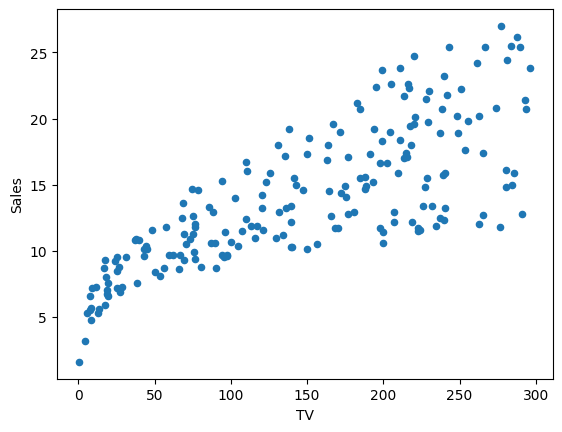

In [4]:
import matplotlib.pyplot as plt

data.plot(x='TV', y='Sales', kind='scatter')

# General steps in your model building
## 1. Preparing your x(independent values) and y(dependent value, Target) 

In [32]:
x = data['TV']
y = data['Sales']
print(x, y)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


## 2. split the data into Train and test datas

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12)
# print(x_test.shape)

## 3. Building a model

In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np
regg = LinearRegression()
x_train = x_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
regg.fit(x_train, y_train)

C:\Users\lokanath\AppData\Local\Temp\ipykernel_25256\2566472988.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:, np.newaxis]
C:\Users\lokanath\AppData\Local\Temp\ipykernel_25256\2566472988.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train = y_train[:, np.newaxis]


LinearRegression()

In [35]:
print(regg.intercept_)
print(regg.coef_)

[7.24347063]
[[0.04548552]]


In [38]:
# x_test = x_test[:, np.newaxis]
y_pred = regg.predict(x_test)
y_pred

array([[17.62781456],
       [ 9.79975679],
       [ 8.1349868 ],
       [18.04173278],
       [11.91483341],
       [17.00921151],
       [19.12883668],
       [11.66466306],
       [12.57437343],
       [12.71082999],
       [14.67125584],
       [14.90323199],
       [ 7.62554899],
       [13.67057443],
       [20.42062541],
       [ 9.19934794],
       [12.3787857 ],
       [10.32738881],
       [17.18205648],
       [16.03127285],
       [16.56800198],
       [ 8.05766142],
       [20.72537839],
       [ 9.95440755],
       [16.77723536],
       [11.81021672],
       [16.64987591],
       [11.25984194],
       [ 7.83933093],
       [ 8.40789991],
       [10.45474826],
       [20.32510582],
       [16.23140914],
       [18.65578729],
       [ 8.09404984],
       [15.65374305],
       [14.77587254],
       [16.29054031],
       [ 9.26757622],
       [ 7.63919465]])

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("MSE: "+str(mse))
print("R2 :"+ str(r_squared))

MSE: 9.084484553750142
R2 :0.7176344112762998


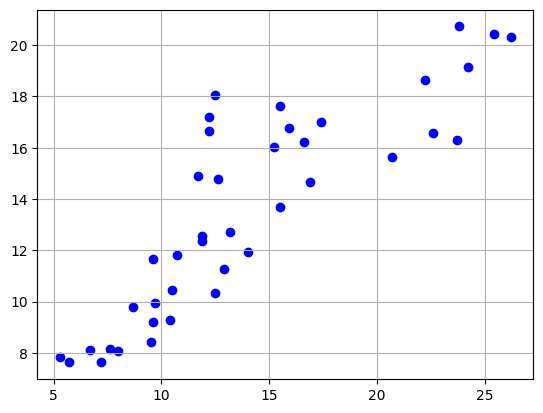

In [40]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, c='b')
plt.grid()
plt.show()


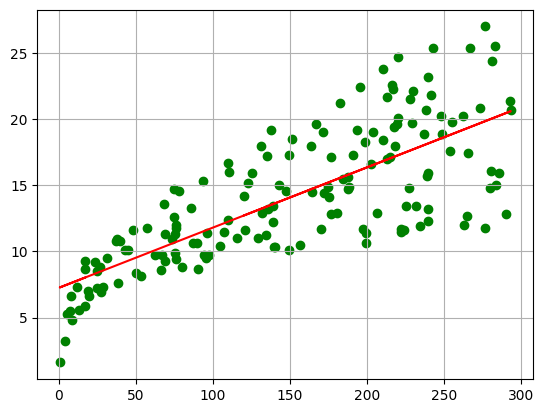

array([[20.88912625]])

In [44]:
y_train_pred = regg.predict(x_train)
plt.scatter(x_train, y_train, c='g')
plt.plot(x_train, y_train_pred, c='r')
plt.grid()
plt.show()
regg.predict([[300]])